## Оглавление
1. [Общая информация.](#Шаг_1)
    1. [Чтение из файла.](#Шаг_1.1)
    2. [Просмотр наименований столбцов.](#Шаг_1.2)
    3. [Просмотр .info()](#Шаг_1.3)
    4. [Просмотр .describe()](#Шаг_1.4)
    5. [Поиск дубликатов .duplicated()](#Шаг_1.5)
    6. [Общий вывод](#Шаг_1.6)
2. [Подготовка данных. ](#Шаг_2)
    1. [Данные к нужным типам](#Шаг_2.1)
    2. [Найдите и исправьте ошибки в данных.](#Шаг_2.2) 
    3. [Звонки и минуты разговора по месяцам](#Шаг_2.3) 
    4. [Отправленных сообщений по месяцам](#Шаг_2.4) 
    5. [Объем израсходованного интернет-трафика по месяцам](#Шаг_2.5) 
    6. [Помесячная выручка с каждого пользователя](#Шаг_2.6) 
3. [Анализ данных.](#Шаг_3)
    1. [Сколько минут разговора](#Шаг_3.1) 
    2. [Сколько сообщений](#Шаг_3.2) 
    3. [Объём интернет-трафика ](#Шаг_3.3) 
4. [Проверка гипотез.](#Шаг_4)
    1. [Средняя выручка пользователей тарифов](#Шаг_4.1)
    2. [Средняя выручка пользователей разных городов](#Шаг_4.2)
    3. [Пояснение. Формулировка нулевой и альтернативной гипотезы](#Шаг_4.3)
5. [Общий вывод.](#Шаг_5)

### Общая информация
<a name="Шаг_1"></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from pymystem3 import Mystem
m = Mystem()
from collections import Counter
import math
import numpy as np
from scipy import stats as st

#### A. Чтение из файла.
<a name="Шаг_1.1"></a>

In [38]:
data_calls = pd.read_csv('calls.csv')

In [39]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [40]:
data_internet = pd.read_csv('internet.csv')

In [41]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [42]:
data_messages = pd.read_csv('messages.csv')

In [43]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [44]:
data_tariffs = pd.read_csv('tariffs.csv')

In [45]:
data_tariffs.head(5)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [46]:
data_users = pd.read_csv('users.csv')

In [47]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [48]:
data_all = [data_calls, data_internet, data_messages, data_tariffs, data_users]

Загрузил, собрал все в один список. data_all

[Home](#Оглавление)

#### B. Просмотр наименований столбцов.
<a name="Шаг_1.2"></a>

In [49]:
for data in data_all:
    display(data.columns)
    display('_________________________________________________________________________________')

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

'_________________________________________________________________________________'

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

'_________________________________________________________________________________'

Index(['id', 'message_date', 'user_id'], dtype='object')

'_________________________________________________________________________________'

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

'_________________________________________________________________________________'

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

'_________________________________________________________________________________'

In [50]:
data_calls.columns = ['call_id', 'call_date', 'duration', 'user_id']

In [51]:
data_internet.columns = ['index', 'session_id', 'mb_used', 'session_date', 'user_id']

In [52]:
data_messages.columns = ['message_id', 'message_date', 'user_id']

К наименованиям колонок вопросов нет, кроме 'Unnamed: 0' в data_internet. Переименовал в Index, id в session_id.

[Home](#Оглавление)

#### C. Просмотр .info()
<a name="Шаг_1.3"></a>

In [53]:
for data in data_all:
    display(data.head(3))
    display('<<_>>')
    display(data.info())
    display('_____________________________________')

,call_id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


'<<_>>'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   call_id    202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

'_____________________________________'

,index,session_id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000


'<<_>>'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         149396 non-null  int64  
 1   session_id    149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

'_____________________________________'

,message_id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


'<<_>>'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   message_id    123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

'_____________________________________'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


'<<_>>'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

'_____________________________________'

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


'<<_>>'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

'_____________________________________'

data_calls                                      Пропусков нет

    call_id      202607 non-null object         | object не меняю тип
    call_date    202607 non-null object         | date   изменить на дату
    duration     202607 non-null float64        | float  не меняю тип
    user_id      202607 non-null int64          | int    не меняю тип

data_internet                                   Пропусков нет

    Index           149396 non-null int64       | int    не меняю тип
    session_id      149396 non-null object      | object не меняю тип
    mb_used         149396 non-null float64     | float  не меняю тип
    session_date    149396 non-null object      | date   изменить на дату
    user_id         149396 non-null int64       | int    не меняю тип

data_messages                                   Пропусков нет

    message_id      123036 non-null object      | object не меняю тип
    message_date    123036 non-null object      | date   изменить на дату
    user_id         123036 non-null int64       | int    не меняю тип

data_tariffs                                    Пропусков нет

    messages_included        2 non-null int64   | int    не меняю тип
    mb_per_month_included    2 non-null int64   | int    не меняю тип
    minutes_included         2 non-null int64   | int    не меняю тип
    rub_monthly_fee          2 non-null int64   | int    не меняю тип
    rub_per_gb               2 non-null int64   | int    не меняю тип
    rub_per_message          2 non-null int64   | int    не меняю тип
    rub_per_minute           2 non-null int64   | int    не меняю тип
    tariff_name              2 non-null object  | object не меняю тип

data_users                                      Пропуски есть

    user_id       500 non-null int64            | int    не меняю тип
    age           500 non-null int64            | int    не меняю тип
    churn_date    38 non-null object            | Пропуски оставить, изменить на дату
    city          500 non-null object           | object не меняю тип 
    first_name    500 non-null object           | object не меняю тип
    last_name     500 non-null object           | object не меняю тип
    reg_date      500 non-null object           | date   изменить на дату
    tariff        500 non-null object           | object не меняю тип
[Home](#Оглавление)

#### D. Просмотр .describe()
<a name="Шаг_1.4"></a>

In [54]:
for data in data_all:
    display(data.describe())
    display('_________________________________________________________________________________')

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


'_________________________________________________________________________________'

,index,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


'_________________________________________________________________________________'

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


'_________________________________________________________________________________'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


'_________________________________________________________________________________'

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


'_________________________________________________________________________________'



[Home](#Оглавление)

#### E. Поиск дубликатов .duplicated()
<a name="Шаг_1.5"></a>

In [55]:
for data in data_all:
    display(data.duplicated().sum())
    display('_')

0

'_'

0

'_'

0

'_'

0

'_'

0

'_'

Дубликатов нет

[Home](#Оглавление)

<a name="Шаг_1.6"></a>

#### F. Общий вывод.

    Поправил названия колонок, в нескольких местах необходимо поменять тип данных.
    При первом рассмотрение ничего удалять не надо.
    Дубликатов нет.




[Home](#Оглавление)


Следует отметить возможные причины появления ошибок в данных. Нулевые звонки можно заменить на 1 или на длительность минималь
    ного звонка пользователя в этом месяце. Оператор округляет значения в вверх. Значит значение "0" не должно было попасть в представленные таблицы.


### Подготовка данных.
<a name="Шаг_2"></a>

#### A. Привести данные к нужным типам
<a name="Шаг_2.1"></a>

In [56]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y.%m.%d')

In [57]:
data_calls.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_id    202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [58]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y.%m.%dT%H:%M:%S')

In [59]:
data_internet.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         149396 non-null  int64         
 1   session_id    149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [60]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y.%m.%dT%H:%M:%S')

In [61]:
data_messages.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   message_id    123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [62]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y.%m.%dT%H:%M:%S')

In [63]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y.%m.%dT%H:%M:%S')

In [64]:
data_users.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Преобразовал, проверил.

[Home](#Оглавление)

#### B. Ошибки в данных.
<a name="Шаг_2.2"></a>

#### data_users

In [70]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [71]:
data_users['user_id'].count()

500

In [72]:
data_users['user_id'].value_counts().max()

1

500 значений, все по одному.

In [73]:
data_users['age'].count()

500

In [74]:
data_users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

500 значений, Максимально 75 лет. 

In [75]:
data_users['churn_date'].value_counts()

2018-10-03    2
2018-12-09    2
2018-12-03    2
2018-12-21    2
2018-10-14    2
2018-12-20    1
2018-10-05    1
2018-11-22    1
2018-12-23    1
2018-10-25    1
2018-11-30    1
2018-12-26    1
2018-09-27    1
2018-10-28    1
2018-12-18    1
2018-09-02    1
2018-11-16    1
2018-12-24    1
2018-11-26    1
2018-11-13    1
2018-11-27    1
2018-10-27    1
2018-09-26    1
2018-12-11    1
2018-12-25    1
2018-11-07    1
2018-11-21    1
2018-10-04    1
2018-08-17    1
2018-08-31    1
2018-12-16    1
2018-12-30    1
2018-12-14    1
Name: churn_date, dtype: int64

Действие тарифа, пропуски не убираю.

In [76]:
data_users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Подольск            1
Иваново             1
Нижневартовск       1
Химки               1
Архангельск         1
Name: city, Length: 76, dtype: int64

In [77]:
data_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Повторов из-за разницы в написание нет.

In [78]:
data_users['first_name'].value_counts()

Радим        6
Леонид       5
Пётр         5
Лолита       4
Адам         4
            ..
Агата        1
Виктор       1
Максим       1
Станислав    1
Аким         1
Name: first_name, Length: 246, dtype: int64

In [79]:
data_users['first_name'].unique()

array(['Рафаил', 'Иван', 'Евгений', 'Белла', 'Татьяна', 'Афанасий',
       'Леонид', 'Юна', 'Рустэм', 'Василиса', 'Эдуард', 'Веселина',
       'Варлам', 'Борис', 'Яков', 'Рузана', 'Марица', 'Мария', 'Матвей',
       'Игнатий', 'Тала', 'Святослав', 'Людмила', 'Иулиан', 'Владислав',
       'Рустем', 'Алексей', 'Мариетта', 'Лаврентий', 'Инна', 'Лия',
       'Розалия', 'Анжелика', 'Изольда', 'Агнесса', 'Юрий', 'Михаил',
       'Константин', 'Марианна', 'Иннокентий', 'Джемма', 'Екатерина',
       'Милица', 'Лола', 'Габриель', 'Кристина', 'Павел', 'Ренальд',
       'Луиза', 'Радислав', 'Динара', 'Лукий', 'Глеб', 'Тамара',
       'Александр', 'Таира', 'Роза', 'Исак', 'Юзефа', 'Ким', 'Гордей',
       'Эльза', 'Гектор', 'Андрей', 'Рафаэль', 'Фёдор', 'Харитон',
       'Еремей', 'Всеволод', 'Софья', 'Авксентий', 'Виолетта', 'Ириней',
       'Гелена', 'Ксения', 'Вера', 'Вениамин', 'Вероника', 'Даниэла',
       'Алла', 'Элеонора', 'Аюна', 'Руслан', 'Онисим', 'Марта', 'Эльвира',
       'Габриэль', '

In [80]:
data_users['last_name'].value_counts()

Андреенко     5
Алексеенко    3
Аркадьев      3
Аничкина      3
Березина      3
             ..
Ефремов       1
Блинова       1
Воронина      1
Завьялова     1
Сухарев       1
Name: last_name, Length: 419, dtype: int64

In [81]:
data_users['last_name'].unique()

array(['Верещагин', 'Ежов', 'Абрамович', 'Белякова', 'Авдеенко', 'Горлов',
       'Ермолаев', 'Березина', 'Пономарёв', 'Блинова', 'Кононов',
       'Алёшко', 'Соловьев', 'Андреенко', 'Акинфьев', 'Алюшина',
       'Сазонова', 'Аленникова', 'Золотов', 'Круглов', 'Костина',
       'Тихонов', 'Трофимова', 'Мельникова', 'Антипов', 'Акинин',
       'Бородин', 'Авдеев', 'Евсеев', 'Селезнев', 'Русанова', 'Тимофеев',
       'Игнатьева', 'Бабушкина', 'Бондарев', 'Аракина', 'Андропова',
       'Архипова', 'Денисова', 'Одинцов', 'Кравцов', 'Добрынин',
       'Родионова', 'Рябов', 'Карасева', 'Александрова', 'Меркулова',
       'Мясникова', 'Ларин', 'Аничкина', 'Сомова', 'Панов', 'Фёдоров',
       'Платонова', 'Артемьев', 'Дьячкова', 'Глушков', 'Свиридов',
       'Рудаков', 'Ситникова', 'Коршунов', 'Климова', 'Алфеева',
       'Игнатова', 'Малахов', 'Абашкина', 'Демьянов', 'Кочетов',
       'Селиванова', 'Чумаков', 'Андрейкин', 'Павловский', 'Никулин',
       'Шарапов', 'Кольцова', 'Литвинов', 'Авр

Имя, Фамилия, все норм.

In [82]:
data_users['user_name'] = data_users['first_name'] + ' ' + data_users['last_name']

In [83]:
data_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,user_name
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,Иван Ежов
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,Евгений Абрамович
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,Белла Белякова
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,Татьяна Авдеенко
...,...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,Авксентий Фокин
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,Трифон Блохин
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,Каролина Агеева
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,Всеволод Акимчин


Создал столбец с Имя - Фамилия. Так как есть имена и фамилии, к примеру: Радим, Пётр и Андреенко ,Абашкина. Встречаются несколько раз.

In [84]:
data_users['reg_date'].value_counts()

2018-05-28    8
2018-10-05    5
2018-01-04    5
2018-11-16    5
2018-04-03    5
             ..
2018-10-13    1
2018-11-13    1
2018-02-24    1
2018-10-30    1
2018-12-21    1
Name: reg_date, Length: 270, dtype: int64

In [85]:
data_users['reg_date'].describe()

count                     500
unique                    270
top       2018-05-28 00:00:00
freq                        8
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: reg_date, dtype: object

In [86]:
data_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

data_users привел в соответствие со своими требованиями.

[Home](#Оглавление)

#### data_calls

In [87]:
data_calls

,call_id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [88]:
data_calls['call_id'].value_counts()

1464_94     1
1222_450    1
1007_543    1
1341_16     1
1112_148    1
           ..
1176_386    1
1381_282    1
1048_220    1
1337_234    1
1377_545    1
Name: call_id, Length: 202607, dtype: int64

In [89]:
data_calls['call_id'].describe()

count      202607
unique     202607
top       1464_94
freq            1
Name: call_id, dtype: object

id звонков не вызывает нареканий

In [90]:
data_calls['call_date'].value_counts()

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

In [91]:
data_calls['call_date'].describe()

count                  202607
unique                    365
top       2018-12-31 00:00:00
freq                     1435
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object

Дата как дата

In [92]:
data_calls['user_id'].describe()

count    202607.000000
mean       1253.940619
std         144.722751
min        1000.000000
25%        1126.000000
50%        1260.000000
75%        1379.000000
max        1499.000000
Name: user_id, dtype: float64

In [93]:
data_calls['user_id'].value_counts()

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

In [94]:
data_calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [95]:
data_calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

39613 значений 0.

In [96]:
data_calls_duration_0 = (
    data_calls
    .query('duration == 0')
    .pivot_table(index = 'user_id', values = 'duration', aggfunc = 'count')
    .sort_values(by = 'duration', ascending=False)
)

In [97]:
data_calls_duration_0

,duration
user_id,
1377,336
1168,308
1453,295
1375,290
1196,262
...,...
1206,6
1424,5
1084,5


In [98]:
data_calls_duration =(
    data_calls
    .query('duration != 0')
    .pivot_table(index = 'user_id', values = 'duration', aggfunc = 'count')
    .sort_values(by = 'duration', ascending=False)
)

In [99]:
data_calls_duration

,duration
user_id,
1377,1424
1168,1384
1375,1270
1453,1145
1196,978
...,...
1441,27
1442,23
1373,17


In [100]:
data_calls_duration = data_calls_duration.merge(data_calls_duration_0 , on='user_id', how='left')

In [101]:
data_calls_duration

,duration_x,duration_y
user_id,,
1377,1424,336
1168,1384,308
1375,1270,290
1453,1145,295
1196,978,262
...,...,...
1441,27,7
1442,23,5
1373,17,7


Соединил выборки. Количество нулевых и не нулевых значений.

In [102]:
data_calls_duration_mean = (
    data_calls
    .query('duration != 0')
    .pivot_table(index = 'user_id', values = 'duration', aggfunc = ['min', 'max', 'mean', 'median'])

)

In [103]:
data_calls_duration_mean

,min,max,mean,median
,duration,duration,duration,duration
user_id,,,,
1000,0.02,24.18,8.253379,7.600
1001,0.01,20.97,8.689783,8.820
1002,0.03,26.44,8.272659,7.290
1003,0.04,26.99,8.412430,7.855
1004,0.32,21.86,6.627410,5.360
...,...,...,...,...
1495,0.01,24.50,7.915386,7.290
1496,0.13,26.15,8.487811,7.680


In [104]:
data_calls_duration_mean.columns  = ['min', 'max', 'mean', 'median']

In [105]:
data_calls_duration = data_calls_duration.merge(data_calls_duration_mean , on='user_id', how='left')

Добавил минимум, максимум, среднее и медиану по длительности звонка.

In [106]:
data_calls_duration.columns = ['duration_not_0','duration_0', 'min', 'max', 'mean', 'median']

Переименовал колонки

In [107]:
data_calls_duration['duration_all'] = data_calls_duration['duration_0'] + data_calls_duration['duration_not_0']

Добавил общее количество звонков

In [108]:
data_calls_duration['%_0'] = data_calls_duration['duration_0'] / data_calls_duration['duration_all'] * 100

Процент нулевых вызовов.

In [109]:
data_calls_duration.sort_values(by = '%_0', ascending=False)

,duration_not_0,duration_0,min,max,mean,median,duration_all,%_0
user_id,,,,,,,,
1257,7,7,0.90,18.49,8.984286,7.030,14,50.000000
1181,53,25,0.13,23.43,8.214717,6.580,78,32.051282
1398,37,16,0.12,20.97,7.889730,7.000,53,30.188679
1016,14,6,0.44,16.01,8.202857,8.720,20,30.000000
1373,17,7,1.78,14.91,7.656471,8.000,24,29.166667
...,...,...,...,...,...,...,...,...
1286,90,14,0.06,25.24,8.181111,8.100,104,13.461538
1406,34,5,0.24,16.16,8.052647,9.365,39,12.820513
1103,49,7,0.45,23.03,8.682245,7.770,56,12.500000


Нулевые значения встречаютсяпримерно от 8.7 % до 50 %. Слишком много для удаления. Необходимо заменить эти значения.

In [110]:
data_calls_duration.sort_values(by = 'min', ascending=False)

,duration_not_0,duration_0,min,max,mean,median,duration_all,%_0
user_id,,,,,,,,
1373,17,7,1.78,14.91,7.656471,8.000,24,29.166667
1190,52,14,1.76,20.09,8.000385,6.840,66,21.212121
1129,48,12,1.69,24.58,8.965833,8.310,60,20.000000
1062,66,17,1.51,27.43,10.041667,10.015,83,20.481928
1297,38,9,1.15,23.87,10.105000,9.395,47,19.148936
...,...,...,...,...,...,...,...,...
1250,447,111,0.01,31.12,8.371678,7.890,558,19.892473
1173,553,140,0.01,29.41,8.169385,7.770,693,20.202020
1256,201,55,0.01,26.01,8.693930,8.180,256,21.484375


In [111]:
data_calls = data_calls.merge(data_calls_duration['min'], on='user_id', how='left')

Добавил в общую таблицу минимальные значения

In [112]:
data_calls.loc[data_calls['duration'] == 0, 'duration'] = data_calls['min']

In [113]:
data_calls['duration'] = [math.ceil(i) for i in data_calls['duration']]

In [114]:
data_calls['duration'] = data_calls['duration'].astype('int')

In [115]:
data_calls

,call_id,call_date,duration,user_id,min
0,1000_0,2018-07-25,1,1000,0.02
1,1000_1,2018-08-17,1,1000,0.02
2,1000_2,2018-06-11,3,1000,0.02
3,1000_3,2018-09-21,14,1000,0.02
4,1000_4,2018-12-15,6,1000,0.02
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,0.07
202603,1499_216,2018-10-18,19,1499,0.07
202604,1499_217,2018-11-10,11,1499,0.07
202605,1499_218,2018-10-06,5,1499,0.07



Округлил минуты вверх с помощью стандартной функции .ceil


Заменил значение '0' на минимальное значение по пользователю. Считаю, что это ошибка данных. Взял минимальное значение, так как среднее значение и медиана будут сильно влиять на результат исследования. Меньше 0 заменил на 1. Так как тариф учитывает только целые минуты.

#### data_messages

In [116]:
data_messages.head()

,message_id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [117]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   message_id    123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [118]:
data_messages['message_id'].describe()

count      123036
unique     123036
top       1174_54
freq            1
Name: message_id, dtype: object

In [119]:
data_messages['message_id'].value_counts()

1174_54     1
1027_90     1
1270_120    1
1354_121    1
1440_495    1
           ..
1066_35     1
1419_163    1
1453_420    1
1433_576    1
1130_392    1
Name: message_id, Length: 123036, dtype: int64

message_id все нормально

In [120]:
data_messages['message_date'].describe()

count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object

Дата и есть дата

In [121]:
data_messages['user_id'].describe()

count    123036.000000
mean       1256.989410
std         143.523967
min        1000.000000
25%        1134.000000
50%        1271.000000
75%        1381.000000
max        1499.000000
Name: user_id, dtype: float64

In [122]:
data_messages['user_id'].value_counts()

1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64

В этой таблице ничего не преобразововал.

#### data_internet

In [123]:
data_internet.head()

,index,session_id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [124]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         149396 non-null  int64         
 1   session_id    149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [125]:
data_internet['index'].value_counts()

2047     1
95620    1
40249    1
38200    1
60727    1
        ..
51916    1
62155    1
64202    1
58057    1
0        1
Name: index, Length: 149396, dtype: int64

In [126]:
data_internet['session_id'].value_counts()

1174_54     1
1296_286    1
1230_54     1
1395_228    1
1452_156    1
           ..
1099_282    1
1120_184    1
1458_230    1
1110_162    1
1465_163    1
Name: session_id, Length: 149396, dtype: int64

In [127]:
data_internet['mb_used'].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

19598 значений '0'. надо расставлять.

In [128]:
data_internet_0 = (
    data_internet
    .query('mb_used == 0')
    .pivot_table(index = 'user_id', values = 'mb_used', aggfunc = 'count')
)

In [129]:
data_internet_not_0 = (
    data_internet
    .query('mb_used != 0')
    .pivot_table(index = 'user_id', values = 'mb_used', aggfunc = 'count')
)

In [130]:
data_internet_mean = (
    data_internet
    .query('mb_used != 0')
    .pivot_table(index = 'user_id', values = 'mb_used', aggfunc = ['min', 'max', 'mean', 'median'])
)

In [131]:
data_internet_mean.columns = ['min', 'max', 'mean', 'median']

In [132]:
data_internet_not_0 = data_internet_not_0.merge(data_internet_0, on='user_id', how='left')

In [133]:
data_internet_not_0 = data_internet_not_0.merge(data_internet_mean, on='user_id', how='left')

In [134]:
data_internet_not_0

,mb_used_x,mb_used_y,min,max,mean,median
user_id,,,,,,
1000,197,14.0,5.66,1364.05,545.138629,547.310
1001,82,14.0,30.87,997.21,395.926829,367.115
1002,297,72.0,1.62,1113.69,390.695354,382.550
1003,102,2.0,43.49,1333.87,561.574902,537.285
1004,278,22.0,25.84,1312.73,536.113237,505.770
...,...,...,...,...,...,...
1495,244,10.0,3.32,1132.20,522.174426,525.200
1496,693,141.0,0.87,1151.62,390.970115,374.070
1497,105,16.0,29.41,1072.92,434.047333,426.110


In [135]:
data_internet_not_0.columns = ['count_mb_used_not_0', 'count_mb_used_0', 'min', 'max', 'mean', 'median']

In [136]:
data_internet_not_0['count_all_mb_used'] = data_internet_not_0['count_mb_used_not_0'] + data_internet_not_0['count_mb_used_0']

In [137]:
data_internet_not_0['%_0'] = data_internet_not_0['count_mb_used_0'] / data_internet_not_0['count_all_mb_used'] * 100 

In [138]:
data_internet_not_0.sort_values(by='%_0', ascending=False)

,count_mb_used_not_0,count_mb_used_0,min,max,mean,median,count_all_mb_used,%_0
user_id,,,,,,,,
1434,39,13.0,38.35,1001.76,393.744359,393.950,52.0,25.000000
1041,69,22.0,35.83,993.83,368.230290,362.670,91.0,24.175824
1190,35,11.0,31.13,801.15,344.269143,308.670,46.0,23.913043
1351,46,14.0,53.04,1049.55,406.018696,382.325,60.0,23.333333
1322,170,49.0,2.94,1232.78,371.436176,336.175,219.0,22.374429
...,...,...,...,...,...,...,...,...
1201,72,1.0,2.50,1325.07,533.529722,506.580,73.0,1.369863
1309,120,1.0,4.10,1379.78,531.037250,530.110,121.0,0.826446
1343,26,NaN,0.44,1554.17,598.245769,575.280,NaN,NaN


количество нулевых значений достигает 25%

In [139]:
data_internet = data_internet.merge(data_internet_not_0['min'], on='user_id', how='left')

Добавил в общую таблицу минимальные значения

In [140]:
data_internet

,index,session_id,mb_used,session_date,user_id,min
0,0,1000_0,112.95,2018-11-25,1000,5.66
1,1,1000_1,1052.81,2018-09-07,1000,5.66
2,2,1000_2,1197.26,2018-06-25,1000,5.66
3,3,1000_3,550.27,2018-08-22,1000,5.66
4,4,1000_4,302.56,2018-09-24,1000,5.66
...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,0.57
149392,149392,1499_153,490.13,2018-12-14,1499,0.57
149393,149393,1499_154,0.00,2018-10-27,1499,0.57
149394,149394,1499_155,1246.32,2018-11-26,1499,0.57


In [141]:
data_internet.loc[data_internet['mb_used'] == 0, 'mb_used'] = data_internet['min']

In [142]:
data_internet['mb_used'] = [math.ceil(i) for i in data_internet['mb_used']]

In [143]:
data_internet['mb_used'] = data_internet['mb_used'].astype('int')


Сделал по тому же приципу, что и с минутами


Сделал как в предыдущей таблице data_calls. Заменил нулевые значния на минимальные. Меньше 0 заменил на 1

In [144]:
data_internet['session_date'].value_counts()

2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-01       3
2018-01-02       3
Name: session_date, Length: 365, dtype: int64

Дата. Все норм

In [145]:
data_internet['user_id'].value_counts()

1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64

id нареканий не вызывает пока.

#### data_tariffs

In [146]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [147]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Необходимости что либо преобразововать пока не вижу.

[Home](#Оглавление)

#### C. Посчитать для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам
    
<a name="Шаг_2.3"></a>

In [148]:
data_users_calls =  data_users.merge(data_calls, on= 'user_id' , how ='left')

In [149]:
data_users_calls['month_calls'] = data_users_calls['call_date'].dt.month

In [150]:
data_users_calls

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,user_name,call_id,call_date,duration,min,month_calls
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин,1000_0,2018-07-25,1.0,0.02,7.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин,1000_1,2018-08-17,1.0,0.02,8.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин,1000_2,2018-06-11,3.0,0.02,6.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин,1000_3,2018-09-21,14.0,0.02,9.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин,1000_4,2018-12-15,6.0,0.02,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202610,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,Гектор Корнилов,1499_215,2018-12-26,1.0,0.07,12.0
202611,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,Гектор Корнилов,1499_216,2018-10-18,19.0,0.07,10.0
202612,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,Гектор Корнилов,1499_217,2018-11-10,11.0,0.07,11.0
202613,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,Гектор Корнилов,1499_218,2018-10-06,5.0,0.07,10.0


In [151]:
month_calls_count = (
    data_users_calls
    .pivot_table(index = ['tariff', 'month_calls', 'user_id'], values = 'call_id',  aggfunc = 'count')
)

In [152]:
month_calls_count

call_id
tariff month_calls user_id         
smart  1.0         1005          15
                   1032          61
                   1045           1
                   1055          64
                   1071          24
...                             ...
ultra  12.0        1476          81
                   1485          94
                   1491          90
                   1493          84
                   1495         155

[3174 rows x 1 columns]

In [153]:
month_calls_sum = (
    data_users_calls
    .pivot_table(index = ['tariff', 'month_calls', 'user_id'], values = 'duration',  aggfunc = 'sum')
)

In [154]:
month_calls_sum

duration
tariff month_calls user_id          
smart  1.0         1005         99.0
                   1032        397.0
                   1045          9.0
                   1055        568.0
                   1071        200.0
...                              ...
ultra  12.0        1476        602.0
                   1485        606.0
                   1491        686.0
                   1493        586.0
                   1495       1066.0

[3174 rows x 1 columns]

Объединил таблицу со всеми пользователями с таблицей по звонкам. Отсортировал и сохранил в отдельную таблицу количество и время звонков по месяцам.

[Home](#Оглавление)

#### D. Количество отправленных сообщений по месяцам для каждого пользователя
    
<a name="Шаг_2.4"></a>

In [158]:
data_users_mess = data_users.merge(data_messages, on= 'user_id' , how ='left')

In [159]:
data_users_mess['month_mess'] = data_users_mess['message_date'].dt.month

In [160]:
month_mess_count = (
    data_users_mess
    .pivot_table(index = ['tariff','month_mess', 'user_id'], values = 'message_id',  aggfunc = 'count')
)

In [161]:
month_mess_count

message_id
tariff month_mess user_id            
smart  1.0        1005              7
                  1032             38
                  1045              5
                  1055             30
                  1071             16
...                               ...
ultra  12.0       1476             11
                  1485            155
                  1491             51
                  1493             78
                  1495             84

[2717 rows x 1 columns]

Объединил таблицу со всеми пользователями с таблицей по смс. Отсортировал и сохранил в отдельную таблицу по месяцам.

[Home](#Оглавление)

#### E. Объем израсходованного интернет-трафика по месяцам для каждого пользователя

<a name="Шаг_2.5"></a>

In [162]:
data_users_int = data_users.merge(data_internet, on= 'user_id' , how ='left')

In [163]:
data_users_int['month_int'] = data_users_int['session_date'].dt.month

In [164]:
month_int_sum = (
    data_users_int
    .pivot_table(index = ['tariff','month_int', 'user_id'], values = 'mb_used',  aggfunc = 'sum')
)

In [165]:
month_int_sum

mb_used
tariff month_int user_id         
smart  1.0       1005      2730.0
                 1032     24191.0
                 1045      2348.0
                 1055     17115.0
                 1071     15634.0
...                           ...
ultra  12.0      1476     14148.0
                 1485     23663.0
                 1491     22235.0
                 1493     42776.0
                 1495     23454.0

[3203 rows x 1 columns]

Объединил таблицу со всеми пользователями с таблицей по трафику интернет. Отсортировал и сохранил в отдельную таблицу по месяцам.

[Home](#Оглавление)

#### F. Помесячная выручка с каждого пользователя 
<a name="Шаг_2.6"></a>

In [166]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [167]:
month_calls_sum = month_calls_sum.reset_index()

In [168]:
month_calls_sum['minutes_included'] = 0

In [169]:
month_calls_sum['rub_per_minute'] = 0

In [170]:
month_calls_sum['rub_monthly_fee'] = 0

In [171]:
month_calls_sum.loc[month_calls_sum['tariff'] == 'smart', 'minutes_included'] = 500

In [172]:
month_calls_sum.loc[month_calls_sum['tariff'] == 'ultra', 'minutes_included'] = 3000

In [173]:
month_calls_sum.loc[month_calls_sum['tariff'] == 'smart', 'rub_per_minute'] = 3

In [174]:
month_calls_sum.loc[month_calls_sum['tariff'] == 'ultra', 'rub_per_minute'] = 1

In [175]:
month_calls_sum.loc[month_calls_sum['tariff'] == 'smart', 'rub_monthly_fee'] = 550

In [176]:
month_calls_sum.loc[month_calls_sum['tariff'] == 'ultra', 'rub_monthly_fee'] = 1950

In [177]:
month_calls_sum['minutes_ost'] = month_calls_sum['duration'] - month_calls_sum['minutes_included'] 

In [178]:
month_calls_sum.loc[month_calls_sum['minutes_ost'] < 0, 'minutes_ost'] = 0

In [179]:
month_calls_sum['money_calls'] = month_calls_sum['minutes_ost'] * month_calls_sum['rub_per_minute']

In [180]:
money_calls_sum = month_calls_sum[['tariff','month_calls', 'user_id', 'money_calls', 'rub_monthly_fee']]

Посчитал деньги по пользователям, по месяцам

In [181]:
month_mess_count = month_mess_count.reset_index()

In [182]:
month_mess_count['messages_included'] = 0

In [183]:
month_mess_count['rub_per_message'] = 0

In [184]:
month_mess_count.loc[month_mess_count['tariff'] == 'smart', 'messages_included'] = 50

In [185]:
month_mess_count.loc[month_mess_count['tariff'] == 'ultra', 'messages_included'] = 1000

In [186]:
month_mess_count.loc[month_mess_count['tariff'] == 'smart', 'rub_per_message'] = 3

In [187]:
month_mess_count.loc[month_mess_count['tariff'] == 'ultra', 'rub_per_message'] = 1

In [188]:
month_mess_count['messages_ost'] = month_mess_count['message_id'] - month_mess_count['messages_included'] 

In [189]:
month_mess_count.loc[month_mess_count['messages_ost'] < 0, 'messages_ost'] = 0

In [190]:
month_mess_count['money_mess'] = month_mess_count['messages_ost'] * month_mess_count['rub_per_message']

In [191]:
money_mess_sum = month_mess_count[['tariff','month_mess', 'user_id', 'money_mess']]

Посчитал деньги по пользователям, по месяцам

In [192]:
month_int_sum = month_int_sum.reset_index()

In [193]:
month_int_sum['mb_per_month_included'] = 0

In [194]:
month_int_sum['rub_per_mb'] = 0

In [195]:
month_int_sum.loc[month_int_sum['tariff'] == 'smart', 'mb_per_month_included'] = 15360

In [196]:
month_int_sum.loc[month_int_sum['tariff'] == 'ultra', 'mb_per_month_included'] = 30720

In [197]:
month_int_sum.loc[month_int_sum['tariff'] == 'smart', 'rub_per_mb'] = 200 / 1024

In [198]:
month_int_sum.loc[month_int_sum['tariff'] == 'ultra', 'rub_per_mb'] = 150 / 1024

In [199]:
month_int_sum['int_ost'] = month_int_sum['mb_used'] - month_int_sum['mb_per_month_included'] 

In [200]:
month_int_sum.loc[month_int_sum['int_ost'] < 0, 'int_ost'] = 0

In [201]:
month_int_sum['money_int'] = month_int_sum['int_ost'] * month_int_sum['rub_per_mb']

In [202]:
money_int_sum = month_int_sum[['tariff','month_int', 'user_id', 'money_int']]

Посчитал деньги по пользователям, по месяцам

In [203]:
money_mess_sum.columns = ['tariff', 'month','user_id', 'money_mess' ]

In [204]:
money_calls_sum.columns = ['tariff', 'month','user_id', 'money_calls', 'abonement' ]

In [205]:
money_int_sum.columns = ['tariff', 'month','user_id', 'money_int' ]

In [206]:
money = pd.merge(money_calls_sum, money_mess_sum, on = ['tariff', 'month','user_id'], how = 'outer' )

In [207]:
money = money.merge( money_int_sum, on = ['tariff', 'month','user_id'], how = 'outer' )

In [208]:
money = money.fillna('0')

In [209]:
money.loc[money['tariff'] == "smart", 'abonement'] = 550

In [210]:
money.loc[money['tariff'] == "ultra", 'abonement'] = 1950

In [211]:
money['money_calls'] = money['money_calls'].astype('float')

In [212]:
money['money_mess'] = money['money_mess'].astype('float')

In [213]:
money['money_int'] = money['money_int'].astype('float')

In [214]:
money['summ'] = money['month'] + money['money_mess'] + money['money_int'] + money['abonement']

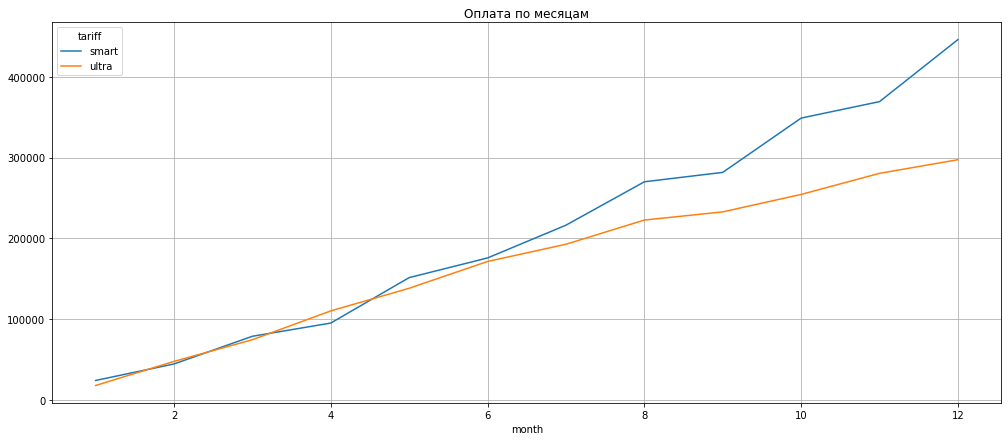

In [215]:
(
    money
    .pivot_table(index = 'month', columns='tariff',  values = 'summ', aggfunc = 'sum')
    .plot( figsize = (17, 7),grid = True, title = 'Оплата по месяцам')
)

Пользователи тарифа Smart платят больше.

[Home](#Оглавление)

### Анализ данных
<a name="Шаг_3"></a>

#### A. Поведение клиентов оператора. Сколько минут разговора.
<a name="Шаг_3.1"></a>

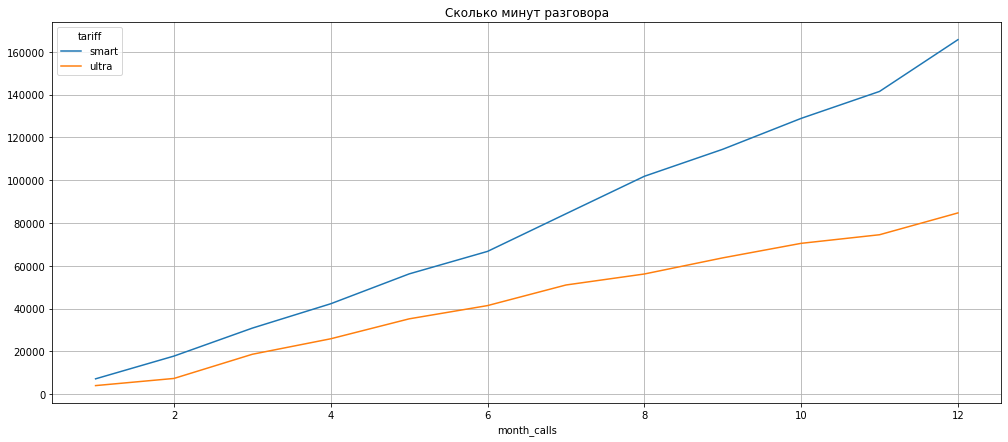

In [216]:
(
    month_calls_sum
    .pivot_table(index = 'month_calls', columns='tariff',  values = 'duration', aggfunc = 'sum')
    .plot( figsize = (17, 7),grid = True, title = 'Сколько минут разговора')
)

С Января месяца, количество разговорных минут по обоим тарифам заметно увеличивается. Тариф Smart заметно обгоняет тариф Ultra, по проговоренному времени.

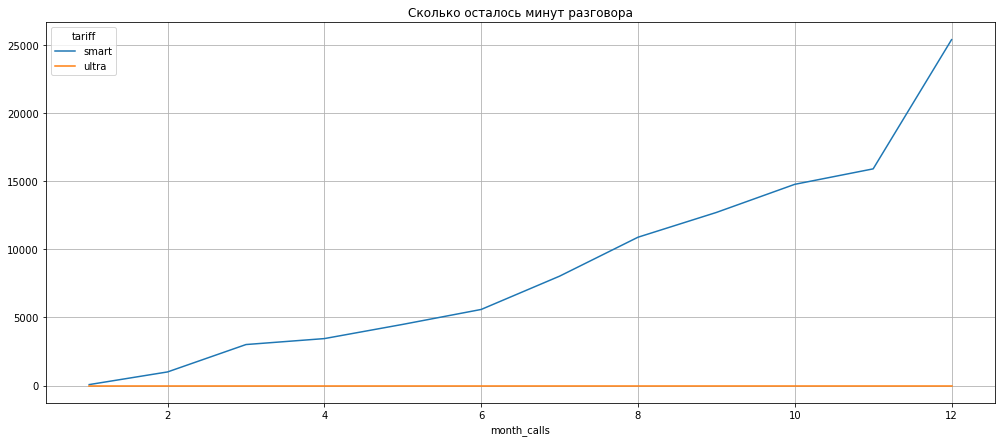

In [217]:
(
    month_calls_sum
    .pivot_table(index = 'month_calls', columns='tariff',  values = 'minutes_ost', aggfunc = 'sum')
    .plot( figsize = (17, 7),grid = True, title = 'Сколько осталось минут разговора')
)

При рассмотрение графика оставшихся платных минут, следует отметить, что по тарифу Ultra клиент не выговаривает минуты входящие в абонентскую плату. По тарифу Smart прослеживается увеличение количества минту не входящих в абонентскую плату. Соответственно увеличивается оплата.

In [218]:
month_calls_count = month_calls_count.reset_index()

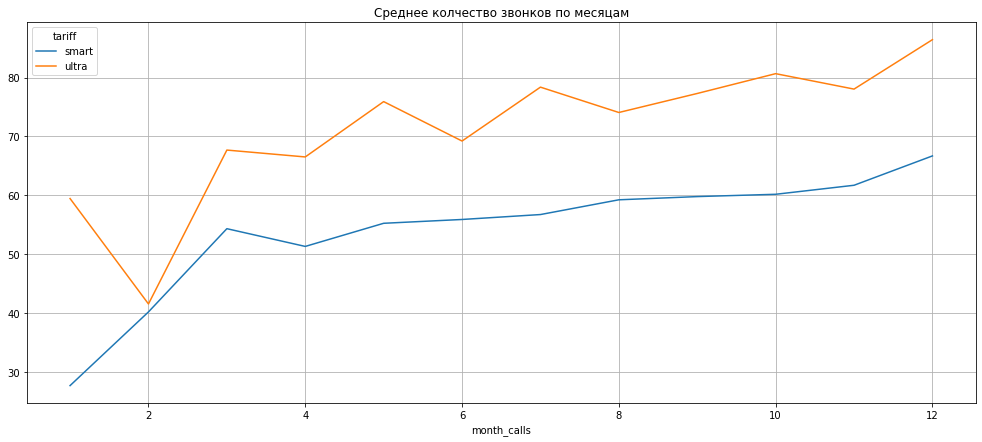

In [219]:
(
    month_calls_count
    .pivot_table(index = 'month_calls', columns='tariff',  values = 'call_id', aggfunc = 'mean')
    .plot( figsize = (17, 7),grid = True, title = 'Среднее колчество звонков по месяцам')
)

На представленном графике так же заметна тенденция к увеличению среднего ежемесячного количества звонков по обоим тарифам.

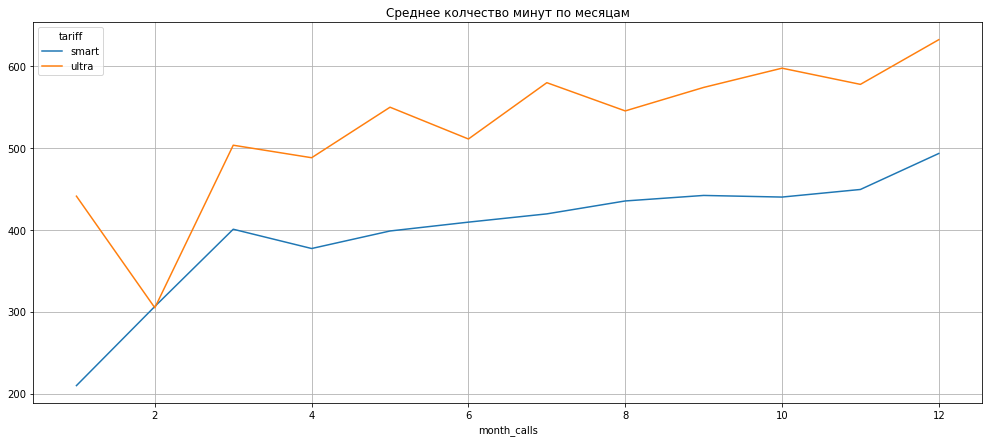

In [220]:
(
    month_calls_sum
    .pivot_table(index = 'month_calls', columns='tariff',  values = 'duration', aggfunc = 'mean')
    .plot( figsize = (17, 7),grid = True, title = 'Среднее колчество минут по месяцам')
)

Средлнее количество минут по месяцам так же показывает тенденцию к увеличение у обоих тарифов.

#### Среднее количество, дисперсия и стандартное отклонение

In [221]:
calls_sum = (
    month_calls_sum 
    .pivot_table(index = 'month_calls', columns='tariff',  values = 'duration', aggfunc = ['mean', 'var', 'std'])
)

In [222]:
calls_sum = calls_sum.reset_index()

In [223]:
calls_sum

month_calls        mean                       var                 \
tariff                   smart       ultra         smart          ultra   
0              1.0  209.705882  440.888889  25214.335116   78384.611111   
1              2.0  306.310345  304.666667  38029.972172   92586.231884   
2              3.0  400.532468  503.081081  38523.594327  117100.798799   
3              4.0  377.008929  487.811321  36513.486406   69343.732946   
4              5.0  398.404255  549.468750  36358.585410   78923.745040   
5              6.0  409.196319  510.666667  31327.208135   89810.575000   
6              7.0  419.288557  579.397727  33858.106318   91827.230799   
7              8.0  435.042735  544.941748  35808.727780   95801.290691   
8              9.0  441.783784  573.594595  34576.898806  103299.097789   
9             10.0  439.798635  597.101695  36510.750409  102369.100681   
10            11.0  449.073016  577.348837  32797.125225   92766.869549   
11            12.0  493.008929  631.895522  40835.686487  113770.515318   

               std              
tariff       smart       ultra  
0       158.790224  279.972518  
1       195.012749  304.279858  
2       196.274283  342.199940  
3       191.085024  263.331982  
4       190.679274  280.933702  
5       176.994938  299.684125  
6       184.005724  303.030082  
7       189.231942  309.517836  
8       185.948646  321.401770  
9       191.077865  319.951716  
10      181.099766  304.576541  
11      202.078417  337.298852

In [224]:
calls_sum.columns = ['month_calls', 'mean_smart', 'mean_ultra', 'var_smart', 'var_ultra', 'std_smart', 'std_ultra']

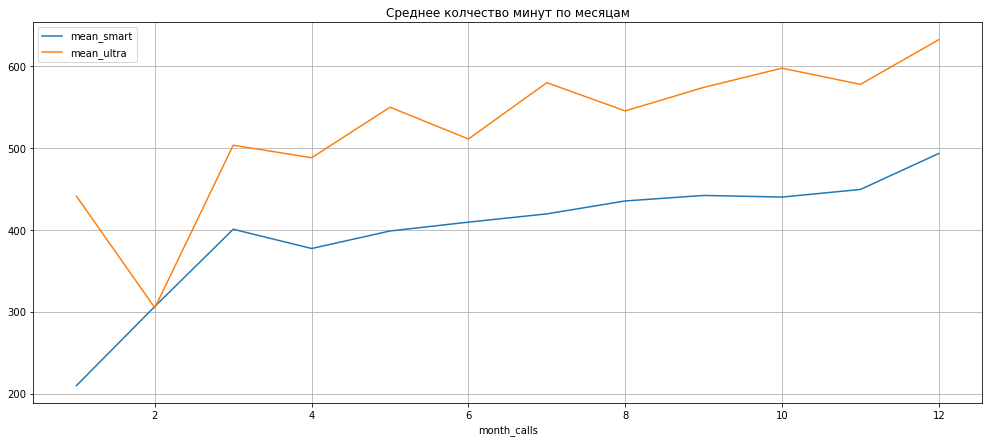

In [225]:
(
    calls_sum
    .plot(x = 'month_calls', y = ['mean_smart', 'mean_ultra'],  figsize = (17, 7),grid = True, title = 'Среднее колчество минут по месяцам')
)

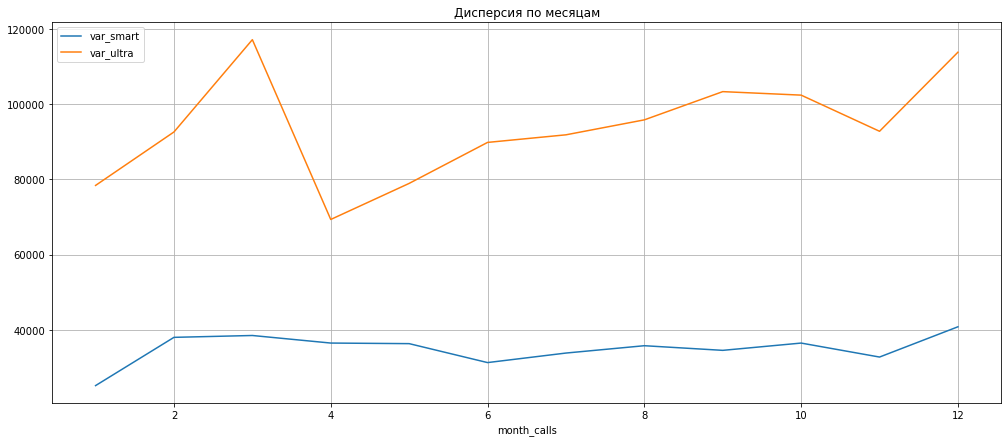

In [226]:
(
    calls_sum
    .plot(x = 'month_calls', y = ['var_smart', 'var_ultra'],  figsize = (17, 7),grid = True, title = 'Дисперсия по месяцам')
)

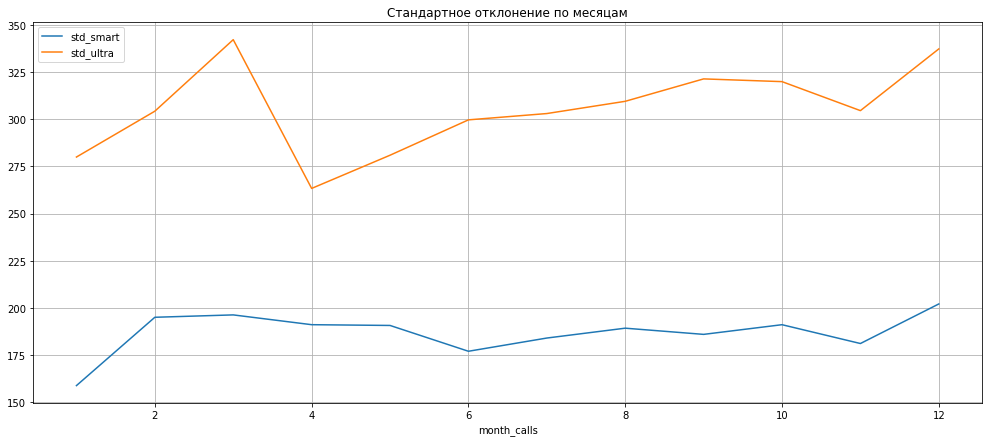

In [227]:
(
    calls_sum
    .plot(x = 'month_calls', y = ['std_smart', 'std_ultra'],  figsize = (17, 7),grid = True, title = 'Стандартное отклонение по месяцам')
)

По графику видно, что основной разброс идет по тарифу Ultra. Smart тариф менее подвержен изменениям.

[Home](#Оглавление)

#### B. Поведение клиентов оператора. Сколько сообщений.
<a name="Шаг_3.2"></a>

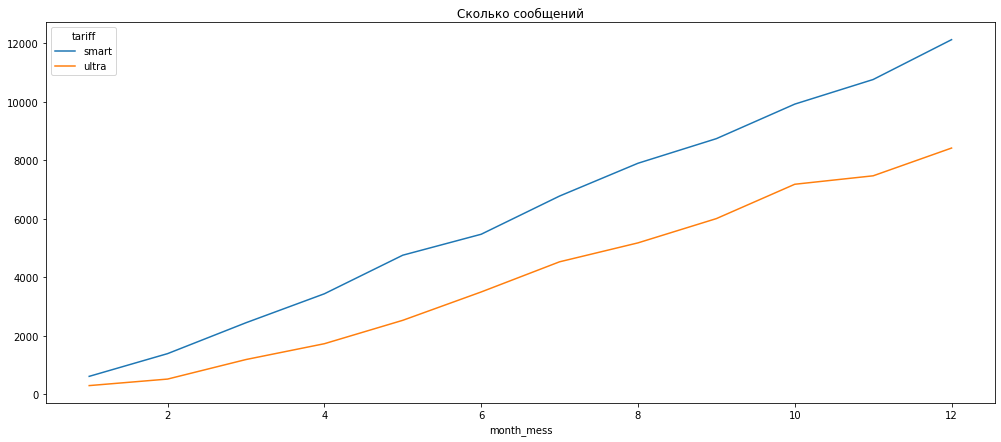

In [228]:
(
    month_mess_count
    .pivot_table(index = 'month_mess', columns='tariff',  values = 'message_id', aggfunc = 'sum')
    .plot( figsize = (17, 7), title = 'Сколько сообщений', )
)

Как и с графиком времени разговоров. Есть тенденция на увеличение количества смс.

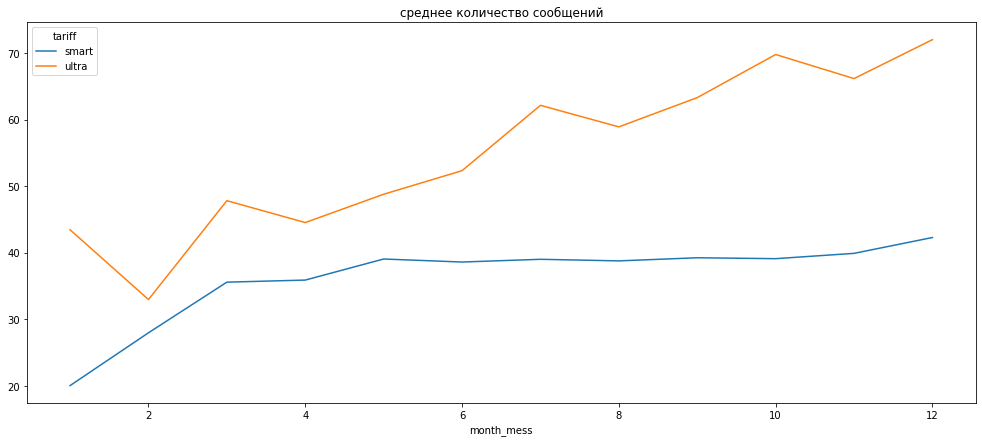

In [229]:
(
    month_mess_count
    .pivot_table(index = 'month_mess', columns='tariff',  values = 'message_id', aggfunc = 'mean')
    .plot( figsize = (17, 7), title = 'среднее количество сообщений', )
)

Не смотря на предыдущий график, видно, что среднее количество отправленных смс помесячно в тарифе Ultra у пользователей увеличивается, а в тарифе Smart зависло во втором полугодие.

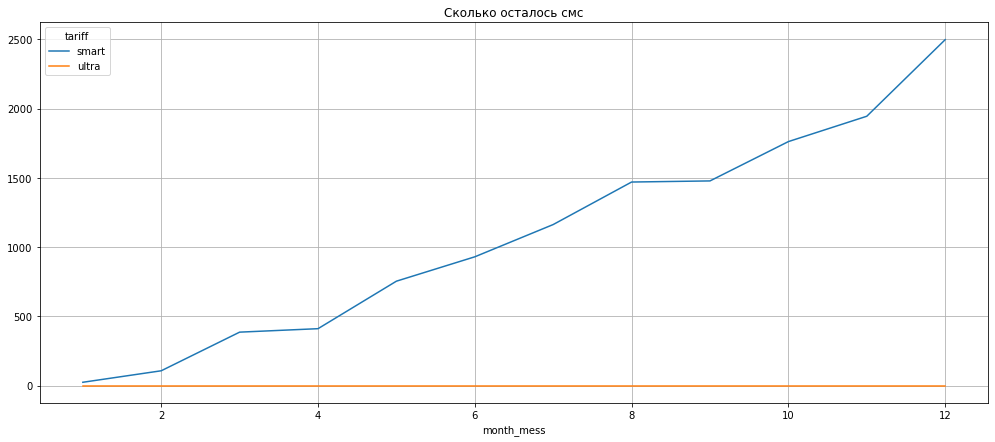

In [230]:
(
    month_mess_count
    .pivot_table(index = 'month_mess', columns='tariff',  values = 'messages_ost', aggfunc = 'sum')
    .plot( figsize = (17, 7),grid = True, title = 'Сколько осталось смс')
)

Так же как и со звонками пользователи тарифа Ultra не израсходуют свои смс, у пользователей тарифа Smart количество платных смс увеличивается.

#### Среднее количество, дисперсия и стандартное отклонение.

In [231]:
mess_sum = (
    month_mess_count 
    .pivot_table(index = 'month_mess', columns='tariff',  values = 'message_id', aggfunc = ['mean', 'var', 'std'])
)

In [232]:
mess_sum = mess_sum.reset_index()

In [233]:
mess_sum

month_mess       mean                    var                     std  \
tariff                 smart      ultra       smart        ultra      smart   
0             1.0  20.000000  43.428571  252.133333   765.285714  15.878707   
1             2.0  27.940000  32.937500  440.465714   713.395833  20.987275   
2             3.0  35.550725  47.800000  669.780477  1826.666667  25.880117   
3             4.0  35.864583  44.512821  517.865680  1408.256410  22.756662   
4             5.0  39.032787  48.769231  638.775776  1559.553544  25.274014   
5             6.0  38.577465  52.313433  731.635801  1935.672999  27.048767   
6             7.0  38.988506  62.136986  719.352468  2190.730974  26.820747   
7             8.0  38.750000  58.897727  767.213054  2022.966432  27.698611   
8             9.0  39.219731  63.294737  702.505555  1906.763270  26.504821   
9            10.0  39.082677  69.776699  736.503019  2426.606511  27.138589   
10           11.0  39.881481  66.159292  711.361366  2249.295828  26.671359   
11           12.0  42.264808  72.008547  832.447114  2362.870616  28.852160   

                   
tariff      ultra  
0       27.663798  
1       26.709471  
2       42.739521  
3       37.526743  
4       39.491183  
5       43.996284  
6       46.805245  
7       44.977399  
8       43.666501  
9       49.260598  
10      47.426742  
11      48.609368

In [234]:
mess_sum.columns = ['month_mess', 'mean_smart', 'mean_ultra', 'var_smart', 'var_ultra', 'std_smart', 'std_ultra']

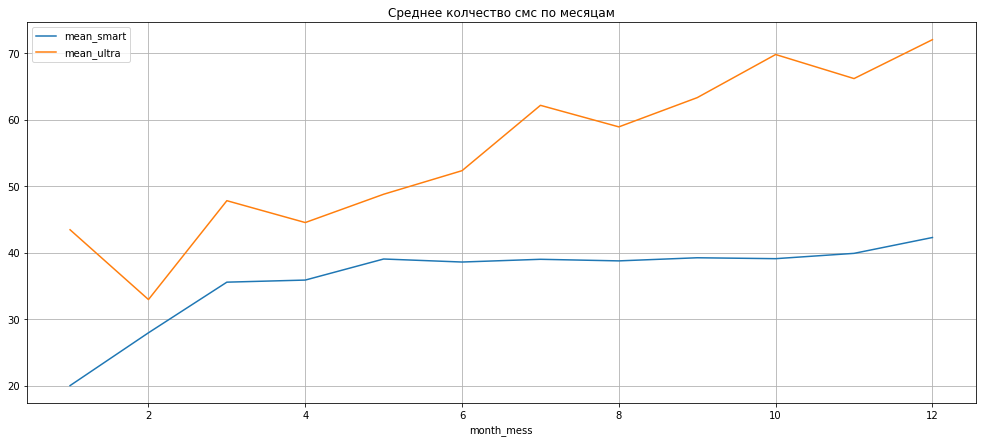

In [235]:
(
    mess_sum
    .plot(x = 'month_mess', y = ['mean_smart', 'mean_ultra'],  figsize = (17, 7),grid = True, title = 'Среднее колчество смс по месяцам')
)

Тариф Smart к середине года вышел на плато. Ultra на улеличение.

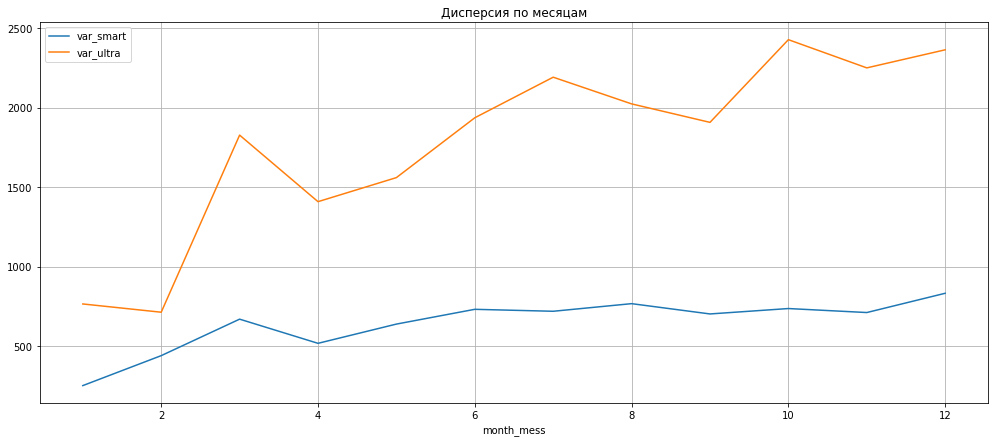

In [236]:
(
    mess_sum
    .plot(x = 'month_mess', y = ['var_smart', 'var_ultra'],  figsize = (17, 7),grid = True, title = 'Дисперсия по месяцам')
)

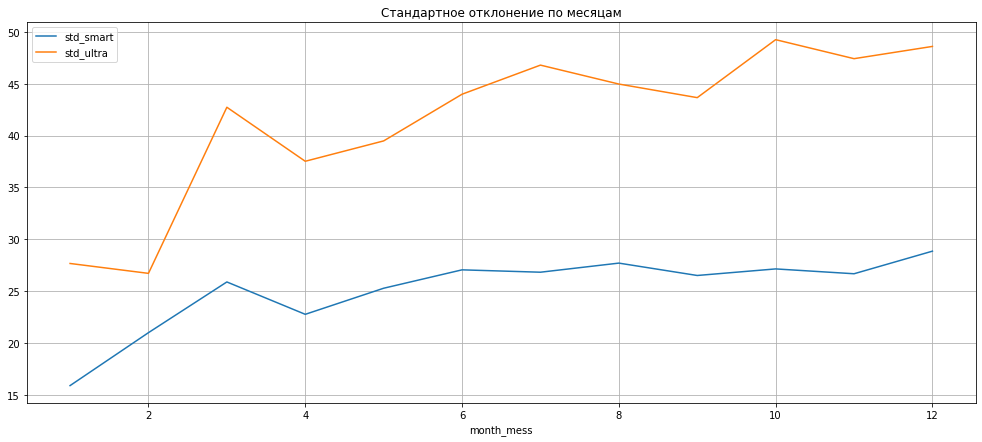

In [237]:
(
    mess_sum
    .plot(x = 'month_mess', y = ['std_smart', 'std_ultra'],  figsize = (17, 7),grid = True, title = 'Стандартное отклонение по месяцам')
)

По графику видно, что основной разброс идет по тарифу Ultra. Smart тариф менее подвержен изменениям.

[Home](#Оглавление)

#### С. Поведение клиентов оператора. Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.
<a name="Шаг_3.3"></a>

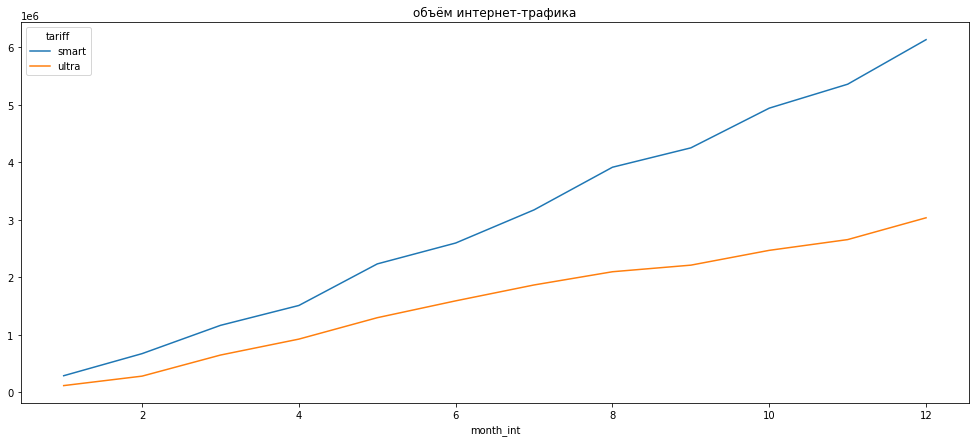

In [238]:
(
    month_int_sum
    .pivot_table(index = 'month_int', columns='tariff',  values = 'mb_used', aggfunc = 'sum')
    .plot( figsize = (17, 7), title = 'объём интернет-трафика', )
)

Прослеживается тенденция к увеличению использования интернетом. Очевидно у пользователей тарифа Smart увеличение идет быстрее.

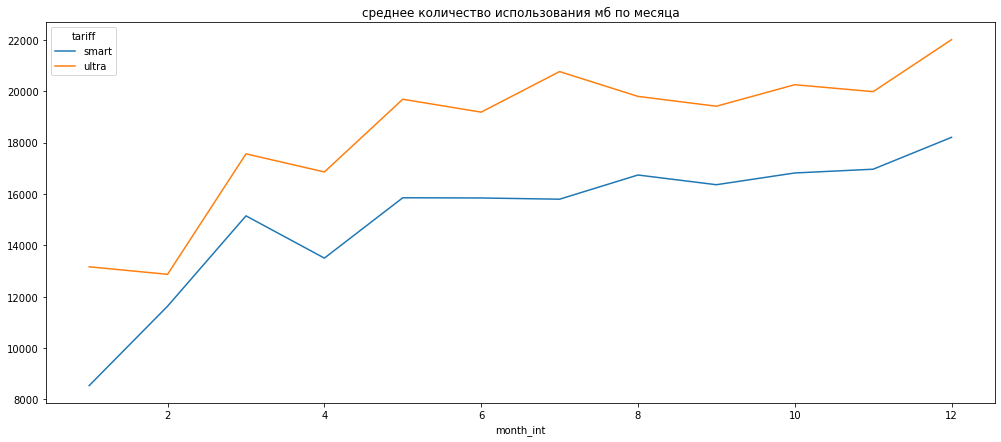

In [239]:
(
    month_int_sum
    .pivot_table(index = 'month_int', columns='tariff',  values = 'mb_used', aggfunc = 'mean')
    .plot( figsize = (17, 7), title = 'среднее количество использования мб по месяца', )
)

До середны года трафик использования мб увеличивался, после замедлился.

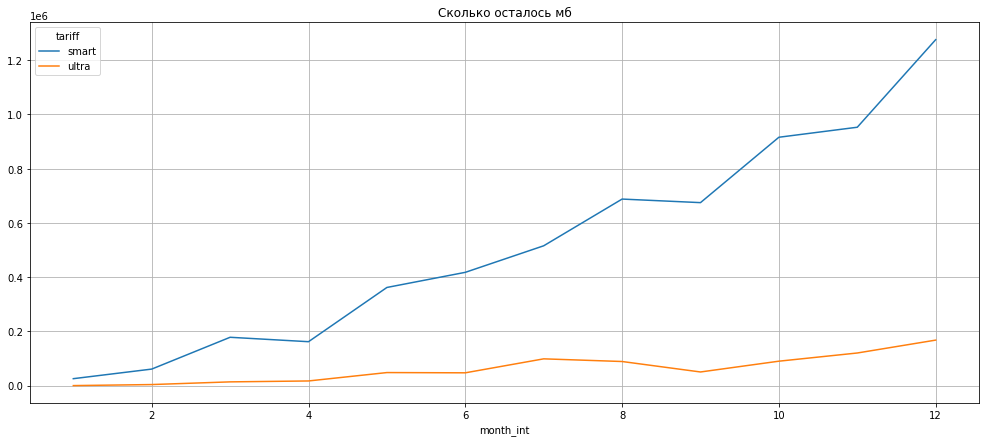

In [240]:
(
    month_int_sum
    .pivot_table(index = 'month_int', columns='tariff',  values = 'int_ost', aggfunc = 'sum')
    .plot( figsize = (17, 7),grid = True, title = 'Сколько осталось мб')
)

Пользователи тарифа Smart оплачивают отдельно намного больше мб, чем пользователи тарифа Ultra.

Следует отметить, что оплата опций, не включенных в абонементскую плату у пользователей тарифа Ultra только интернет.

#### Среднее количество, дисперсия и стандартное отклонение. 

In [241]:
int_sum = (
    month_int_sum 
    .pivot_table(index = 'month_int', columns='tariff',  values = 'mb_used', aggfunc = ['mean', 'var', 'std'])
)

In [242]:
int_sum = int_sum.reset_index()

In [243]:
int_sum

month_int          mean                         var                \
tariff                   smart         ultra         smart         ultra   
0            1.0   8535.764706  13160.777778  4.171432e+07  4.715402e+07   
1            2.0  11628.241379  12868.545455  3.917989e+07  1.099383e+08   
2            3.0  15144.818182  17558.567568  3.406416e+07  1.202277e+08   
3            4.0  13499.455357  16853.781818  3.257670e+07  9.461901e+07   
4            5.0  15849.283688  19685.212121  3.588428e+07  9.679159e+07   
5            6.0  15841.170732  19183.168675  3.367732e+07  8.315703e+07   
6            7.0  15793.318408  20762.422222  3.492079e+07  9.783248e+07   
7            8.0  16735.209402  19796.660377  3.033039e+07  1.073610e+08   
8            9.0  16357.330769  19413.263158  2.709218e+07  8.763399e+07   
9           10.0  16814.772109  20250.942623  3.445626e+07  9.367874e+07   
10          11.0  16961.136076  19980.992481  2.862072e+07  9.610187e+07   
11          12.0  18202.655786  22004.840580  3.123482e+07  1.052828e+08   

                std                
tariff        smart         ultra  
0       6458.662171   6866.878472  
1       6259.383758  10485.147085  
2       5836.450836  10964.840219  
3       5707.599999   9727.230451  
4       5990.349132   9838.271459  
5       5803.216267   9119.047829  
6       5909.381715   9891.030214  
7       5507.303329  10361.514800  
8       5205.015318   9361.302978  
9       5869.945142   9678.778001  
10      5349.833274   9803.156365  
11      5588.811776  10260.742419

In [244]:
int_sum.columns = ['month_int', 'mean_smart', 'mean_ultra', 'var_smart', 'var_ultra', 'std_smart', 'std_ultra']

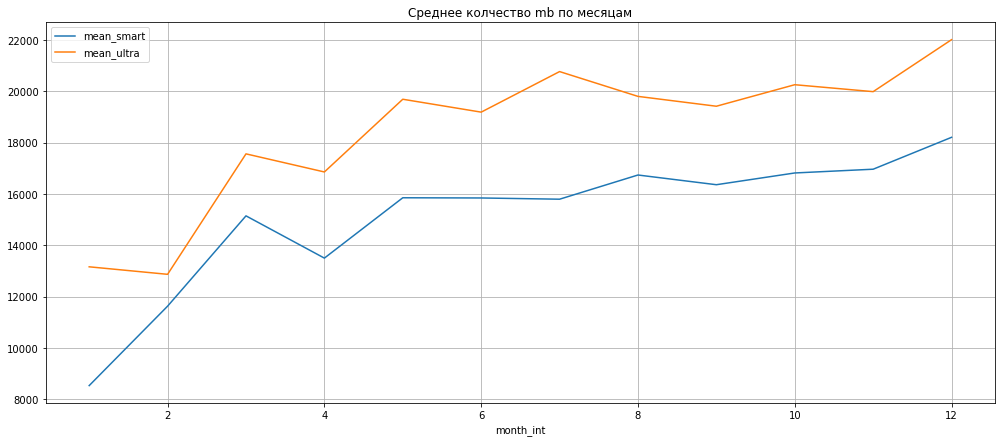

In [245]:
(
    int_sum
    .plot(x = 'month_int', y = ['mean_smart', 'mean_ultra'],  figsize = (17, 7),grid = True, title = 'Среднее колчество mb по месяцам')
)

Оба показателя идут в увеличение. С небольшим спадом в апреле.

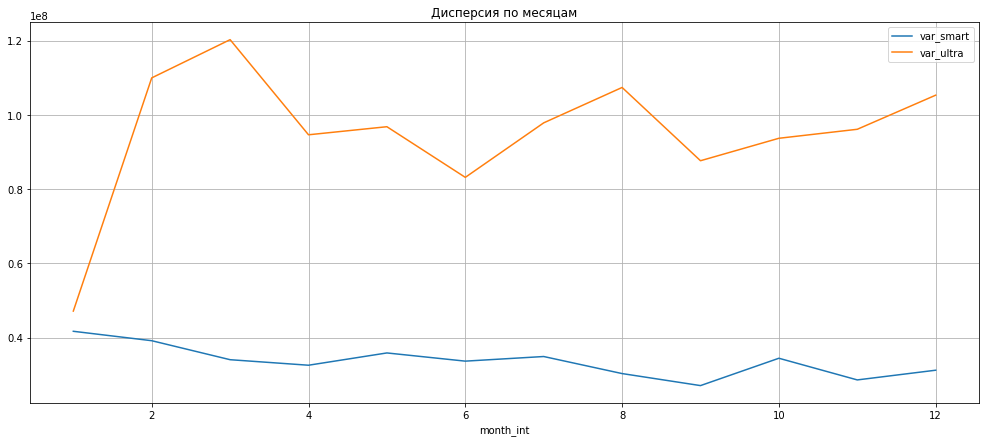

In [246]:
(
    int_sum
    .plot(x = 'month_int', y = ['var_smart', 'var_ultra'],  figsize = (17, 7),grid = True, title = 'Дисперсия по месяцам')
)

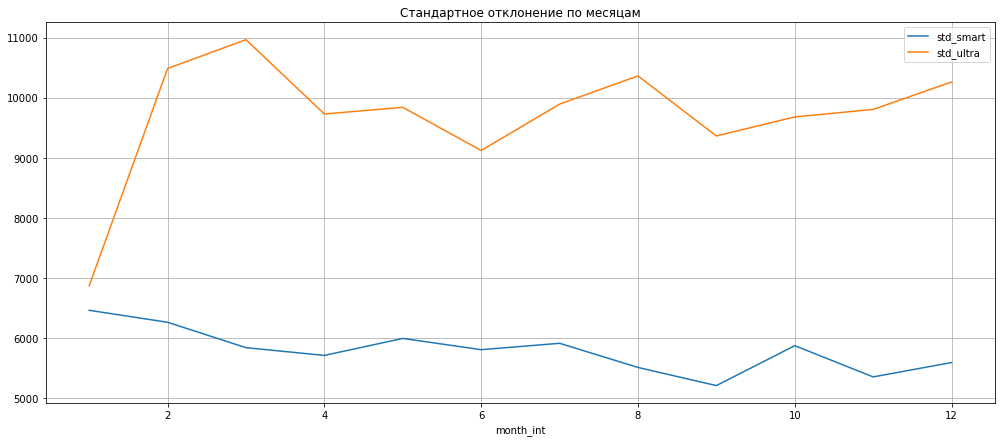

In [247]:
(
    int_sum
    .plot(x = 'month_int', y = ['std_smart', 'std_ultra'],  figsize = (17, 7),grid = True, title = 'Стандартное отклонение по месяцам')
)

По графику видно, что основной разброс идет по тарифу Ultra. Smart тариф менее подвержен изменениям.

[Home](#Оглавление)

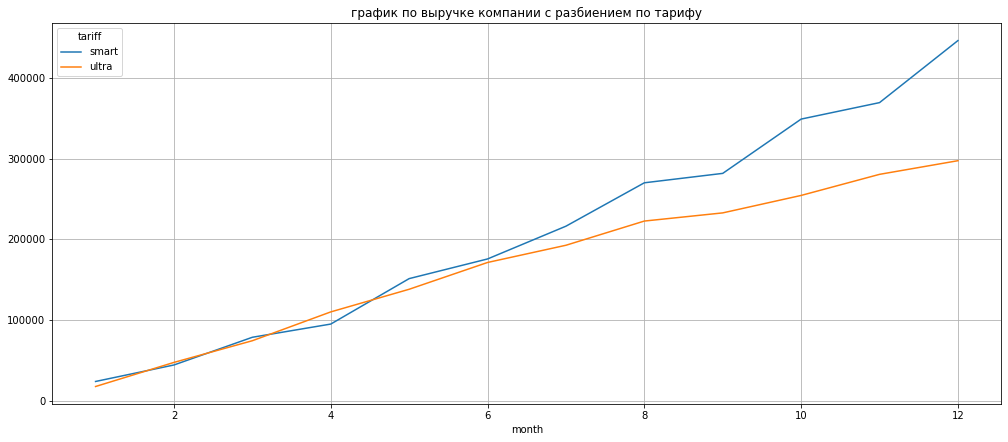

In [248]:
(
    
    money
    .pivot_table(index = 'month', columns = 'tariff', values = 'summ', aggfunc = 'sum')
    .plot( figsize = (17, 7),grid = True, title = 'график по выручке компании с разбиением по тарифу')
)

### Шаг 4. Проверка гипотез.
<a name="Шаг_4"></a>

#### A. Гипотеза. Средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт». Альтернативная гипотеза звучит так: "Средняя выручка пользователей тарифа «Ультра» отлична от средней выручки пользователей тарифа «Смарт»."
<a name="Шаг_4.1"></a>

In [249]:
money_smart = (
    money
    .query('tariff == "smart"')
    .pivot_table(index = ['month', 'user_id'], values = 'summ', aggfunc = 'sum')
)

In [250]:
money_smart = money_smart.reset_index()

In [251]:
money_smart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    2229 non-null   float64
 1   user_id  2229 non-null   int64  
 2   summ     2229 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 52.4 KB


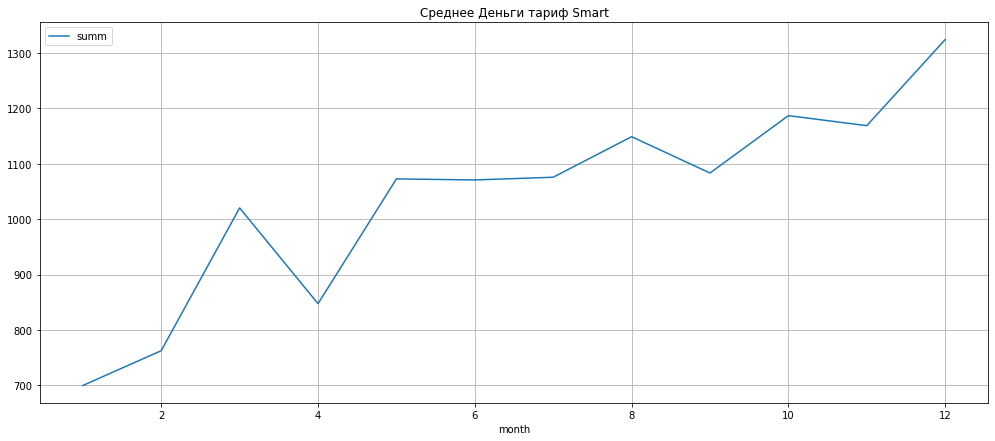

In [252]:
(
    money_smart
    .pivot_table(index = 'month', values = 'summ', aggfunc = 'mean')
    .plot(figsize = (17, 7),grid = True, title = 'Среднее Деньги тариф Smart')
)


In [253]:
money_smart_mean = (
    money_smart
    .pivot_table(index = 'month', values = 'summ', aggfunc = 'mean')
)


In [254]:
money_ultra = (
    money
    .query('tariff == "ultra"')
    .pivot_table(index = ['month', 'user_id'], values = 'summ', aggfunc = 'sum')
)

In [255]:
money_ultra = money_ultra.reset_index()

In [256]:
money_ultra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    985 non-null    float64
 1   user_id  985 non-null    int64  
 2   summ     985 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 23.2 KB


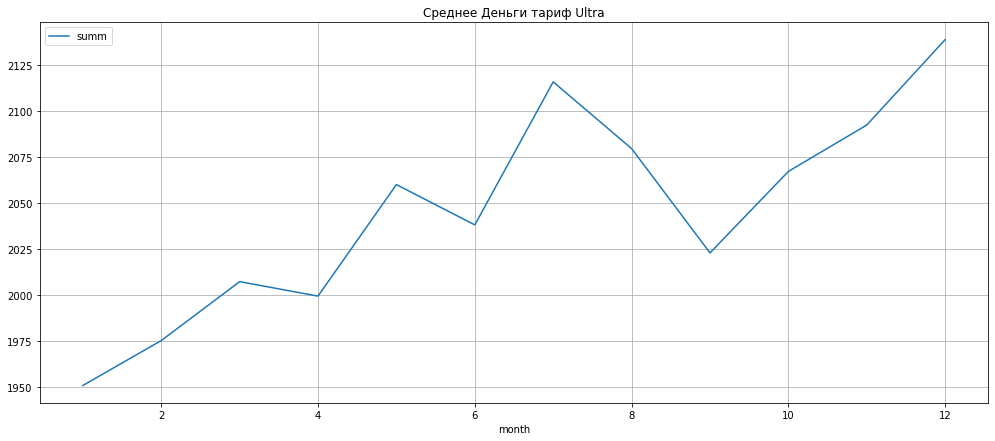

In [257]:
(
    money_ultra
    .pivot_table(index = 'month', values = 'summ', aggfunc = 'mean')
    .plot(figsize = (17, 7),grid = True, title = 'Среднее Деньги тариф Ultra')
)


In [258]:
money_ultra_mean = (
    money_ultra
    .pivot_table(index = 'month', values = 'summ', aggfunc = 'mean')
)


In [259]:
money_smart_mean.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 12 entries, 1.0 to 12.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   summ    12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [260]:
money_ultra_mean.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 12 entries, 1.0 to 12.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   summ    12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [261]:
disp_smart = np.var(money_smart_mean, ddof=1)

In [262]:
disp_ultra = np.var(money_ultra_mean, ddof=1)

In [263]:
disp_smart 

summ    33231.269384
dtype: float64

In [264]:
disp_ultra

summ    3244.255808
dtype: float64

Общепринятые пороговые значения — 5% и 1%

In [265]:
results = st.ttest_ind(money_smart_mean , money_ultra_mean, equal_var = False)

In [266]:
results.pvalue

array([1.01570101e-10])

In [267]:
alpha = .05

In [268]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


[Home](#Оглавление)

#### B. Гипотеза. Нулевая гипотеза гласит : "Средняя выручка пользователей из Москвы равна  выручке пользователей из других регионов" Альтернативная гипотеза гласит: "Средняя выручка пользователей из Москвы не равна  выручке пользователей из других регионов"
<a name="Шаг_4.2"></a>

In [269]:
money_city = (
    money
    .pivot_table(index = ['month', 'user_id'], columns = 'tariff', values = 'summ', aggfunc = 'sum')
)

In [270]:
money_city

tariff               smart   ultra
month user_id                     
1.0   1005      551.000000     NaN
      1032     2275.804688     NaN
      1045      551.000000     NaN
      1055      893.773438     NaN
      1071      604.515625     NaN
...                    ...     ...
12.0  1494     1010.242188     NaN
      1495             NaN  1962.0
      1496     1621.640625     NaN
      1497     1491.687500     NaN
      1499      610.000000     NaN

[3214 rows x 2 columns]

выручка по всем городам по месяцам.

In [271]:
money_city = money_city.reset_index()

срезал индексы

In [272]:
money_city = money_city.fillna('0')

убрал Nan, в выборке. исключу

In [273]:
money_city = money_city.merge(data_users[['user_id', 'city']], on = 'user_id', how = 'left')

Добавил города

In [274]:
money_city_moscow = (
    money_city
    .query('city == "Москва"')
)

In [275]:
money_city_moscow['month'] = money_city_moscow['month'].astype('int')

<ipython-input-275-a1847d52431c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  money_city_moscow['month'] = money_city_moscow['month'].astype('int')


In [276]:
money_city_moscow['smart'] = money_city_moscow['smart'].astype('float')

<ipython-input-276-3d67d18bc17f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  money_city_moscow['smart'] = money_city_moscow['smart'].astype('float')


In [277]:
money_city_moscow['ultra'] = money_city_moscow['ultra'].astype('float')

<ipython-input-277-c9b0f2c732ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  money_city_moscow['ultra'] = money_city_moscow['ultra'].astype('float')


In [278]:
money_city_moscow

,month,user_id,smart,ultra,city
15,1,1204,650.218750,0.0,Москва
19,1,1254,0.000000,1951.0,Москва
23,1,1308,551.000000,0.0,Москва
30,1,1381,0.000000,1951.0,Москва
31,1,1385,0.000000,1951.0,Москва
...,...,...,...,...,...
3169,12,1453,0.000000,1962.0,Москва
3177,12,1461,0.000000,1962.0,Москва
3192,12,1476,0.000000,1962.0,Москва
3196,12,1481,786.609375,0.0,Москва


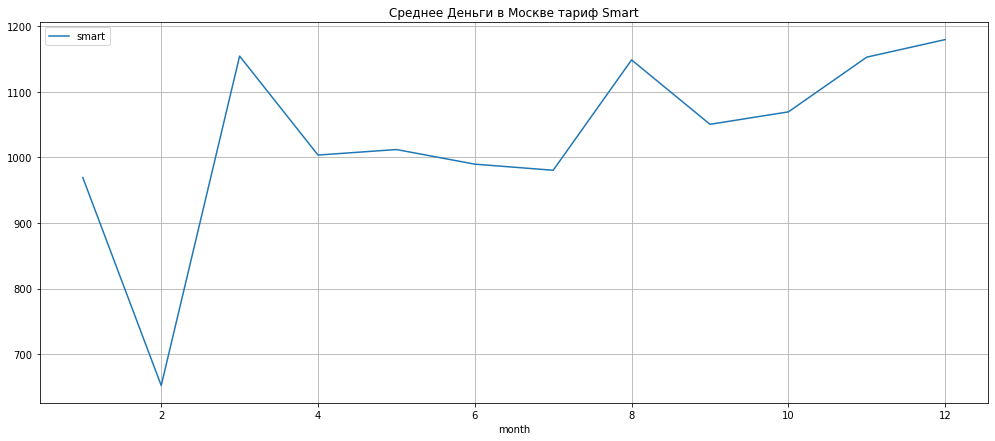

In [279]:
(
    money_city_moscow
    .query('smart != 0')
    .pivot_table(index = 'month', values = 'smart', aggfunc = 'mean')
    .plot(figsize = (17, 7),grid = True, title = 'Среднее Деньги в Москве тариф Smart')
)


In [280]:
money_city_moscow_mean_smart = (
    money_city_moscow
    .query('smart != 0')
    .pivot_table(index = 'month', values = 'smart', aggfunc = 'mean')
)


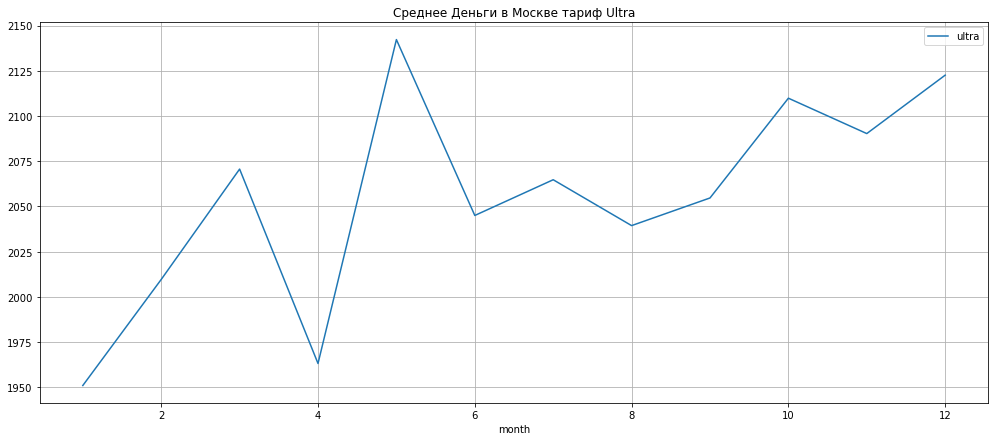

In [281]:
(
    money_city_moscow
    .query('ultra != 0')
    .pivot_table(index = 'month', values = 'ultra', aggfunc = 'mean')
    .plot(figsize = (17, 7),grid = True, title = 'Среднее Деньги в Москве тариф Ultra')
)

In [282]:
money_city_moscow_mean_ultra = (
    money_city_moscow
    .query('ultra != 0')
    .pivot_table(index = 'month', values = 'ultra', aggfunc = 'mean')
)

In [283]:
money_city_other = (
    money_city
    .query('city != "Москва"')
)

In [284]:
money_city_other['month'] = money_city_other['month'].astype('int')

<ipython-input-284-ebad19429fd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  money_city_other['month'] = money_city_other['month'].astype('int')


In [285]:
money_city_other['smart'] = money_city_other['smart'].astype('float')

<ipython-input-285-25f8aad0def5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  money_city_other['smart'] = money_city_other['smart'].astype('float')


In [286]:
money_city_other['ultra'] = money_city_other['ultra'].astype('float')

<ipython-input-286-6eba9a948654>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  money_city_other['ultra'] = money_city_other['ultra'].astype('float')


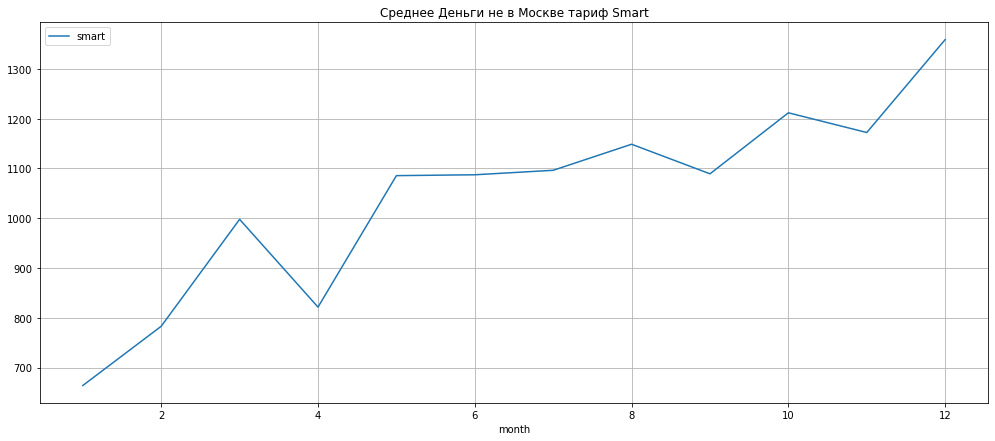

In [287]:
(
    money_city_other
    .query('smart != 0')
    .pivot_table(index = 'month', values = 'smart', aggfunc = 'mean')
    .plot(figsize = (17, 7),grid = True, title = 'Среднее Деньги не в Москве тариф Smart')
)

In [288]:
money_city_other_mean_smart = (
    money_city_other
    .query('smart != 0')
    .pivot_table(index = 'month', values = 'smart', aggfunc = 'mean')
)

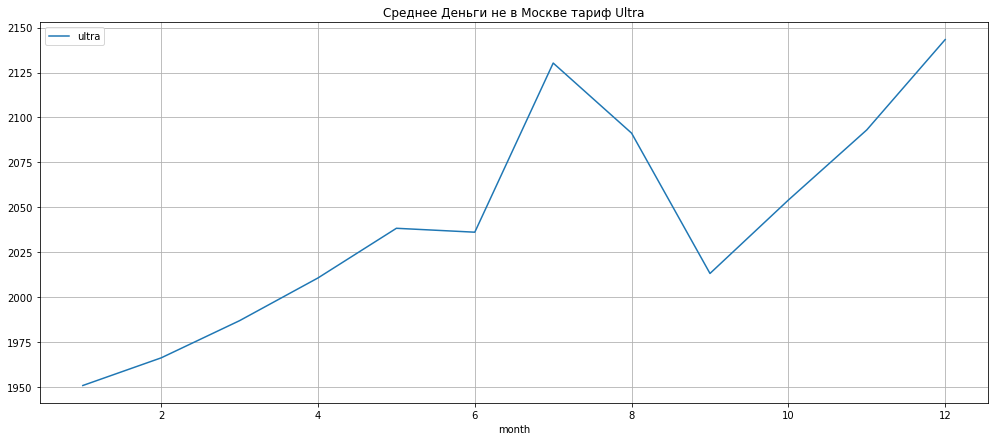

In [289]:
(
    money_city_other
    .query('ultra != 0')
    .pivot_table(index = 'month', values = 'ultra', aggfunc = 'mean')
    .plot(figsize = (17, 7),grid = True, title = 'Среднее Деньги не в Москве тариф Ultra')
)

In [290]:
money_city_other_mean_ultra = (
    money_city_other
    .query('ultra != 0')
    .pivot_table(index = 'month', values = 'ultra', aggfunc = 'mean')
)

In [291]:
disp_moscow_smart = np.var(money_city_moscow_mean_smart, ddof=1)

In [292]:
disp_moscow_ultra = np.var(money_city_moscow_mean_ultra, ddof=1)

In [293]:
disp_other_smart = np.var(money_city_other_mean_smart, ddof=1)

In [294]:
disp_other_ultra = np.var(money_city_other_mean_ultra, ddof=1)

In [295]:
disp_moscow_smart

smart    20079.278317
dtype: float64

In [296]:
disp_other_smart

smart    38844.967127
dtype: float64

In [297]:
disp_moscow_ultra

ultra    3492.399337
dtype: float64

In [298]:
disp_other_ultra

ultra    3826.584684
dtype: float64

In [299]:
alpha = 0.05

Общепринятые пороговые значения — 5% и 1%

In [300]:
results_smart = st.ttest_ind(money_city_moscow_mean_smart, money_city_other_mean_smart, equal_var = False)

In [301]:
if (results_smart.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Средняя выручка пользователей тарифа Smart из Москвы отличается от выручки пользователей из других регионов

In [302]:
results_ultra = st.ttest_ind(money_city_moscow_mean_ultra, money_city_other_mean_ultra, equal_var = True)

In [303]:
if (results_ultra.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Средняя выручка пользователей тарифа Ultra из Москвы не отличается от выручки пользователей из других регионов

[Home](#Оглавление)

In [304]:
money_city_moscow['all_summ'] = money_city_moscow['smart'] + money_city_moscow['ultra']

<ipython-input-304-a21ca3918021>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  money_city_moscow['all_summ'] = money_city_moscow['smart'] + money_city_moscow['ultra']


In [305]:
money_city_other['all_summ'] = money_city_other['smart'] + money_city_other['ultra']

<ipython-input-305-e72cc33a5c1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  money_city_other['all_summ'] = money_city_other['smart'] + money_city_other['ultra']


In [306]:
money_city_moscow_mean = (
    money_city_moscow
    .pivot_table(index = 'month', values = 'all_summ', aggfunc = 'mean')
)

In [307]:
money_city_other_mean = (
    money_city_other
    .pivot_table(index = 'month', values = 'all_summ', aggfunc = 'mean')
)

In [308]:
disp_moscow = np.var(money_city_moscow_mean, ddof=1)

In [309]:
disp_moscow

all_summ    10730.451555
dtype: float64

In [310]:
disp_other = np.var(money_city_other_mean, ddof=1)

In [311]:
disp_other

all_summ    37675.100155
dtype: float64

In [312]:
alpha = 0.05

In [313]:
results = st.ttest_ind(money_city_moscow_mean, money_city_other_mean, equal_var = False)

In [314]:
if (results_smart.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу



Исходя из проверки. Гипотезу не получилось отвергнуть.


#### Формулировка нулевой и альтернативной гипотезы
<a name="Шаг_4.3"></a>

Чтобы понять какой тариф приносит больше денег была сформулирова нулевая гипотеза. "Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны." Следовательно альтернативная гипотеза будет звучать как "Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна". После проверки нулевой гипотезы, отвергаем ее (нулевую гипотезу). Следовательно средняя выручка приносимая пользователями разных тарифов различается.

Вторая нулевая гипотезы звучит так "Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов". Следовательно альтернативная гипотеза будет звучать как "Средняя выручка пользователей из Москвы  не равна выручке пользователей из других регионов". После проверки нулевой гипотезы, ее(гипотезы) утверждение отвергнуть не получилось. Следовательно средняя выручка пользователей тарифов Smart и Ultra из Москвы равна выручке пользователей тарифов Smart и Ultra из других регионов.
Аналогичные результат получился и без разбивки по тарифам.

[Home](#Оглавление)

### Общий вывод.
<a name="Шаг_5"></a>

После рассмотрения поступивших данных были выявлены следующие закономерности.

- Происходит постепенное увеличение как количества звонков, так и их длительности.
- Пользователи тарифа Smart регулярно израсходуют включенные опции.
- Пользователи тарифа Ultra не израсходуют оплаченные опции. Дополнительно оплачивается только интернет.

Средняя выручка приносимая пользователями разных тарифов различается.

Средняя выручка пользователей тарифов Smart и Ultra из Москвы равна выручке пользователей тарифов Smart и Ultra из других регионов соответственно. 

Аналогичный результат получился и без разбивки по тарифам. Средняя выручка пользователей из Москвы равна выручке пользователей  из других регионов соответственно.

Итого. Пользователи тарифа Smart, даже с учетом низкой абонентской платы, приносят денег больше, чем пльзователи тарифа Ultra.
Москва дает денег столько же, сколько и из остальных регионов.
Следует развернуть рекламную компанию в регионах, или предложить более интересный тариф для пользователей регионов. (скидки, компенсации)

[Home](#Оглавление)